In [1]:
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
data = pd.read_csv("clean data/clean_data_train_encoded.csv")

data_test = pd.read_csv("clean data/clean_data_test_encoded.csv")

In [4]:
wcss = []
silhouette_scores = []
K_range = range(1, 11)  # Thử từ 1 đến 10 cụm

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # inertia_ là tổng bình phương sai số WCSS
    
    if k > 1:  # Silhouette score không được định nghĩa cho K=1
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)  # Đặt 0 cho K=1



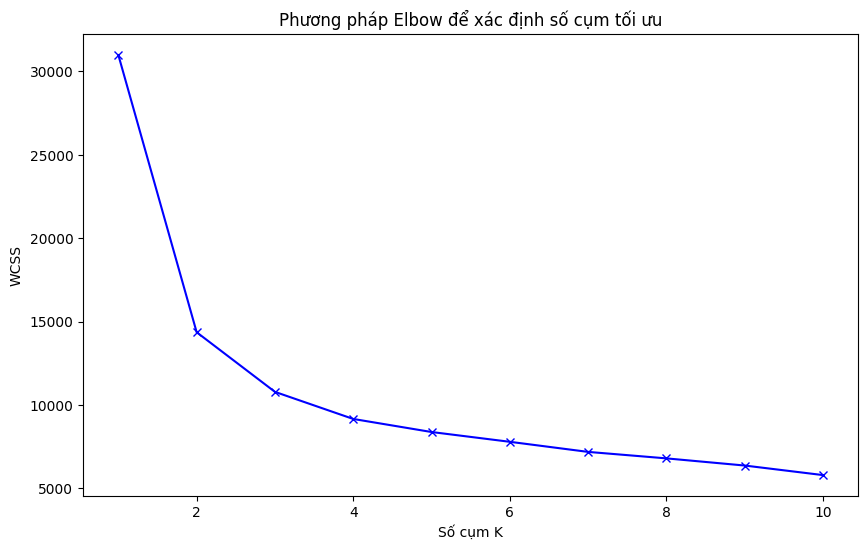

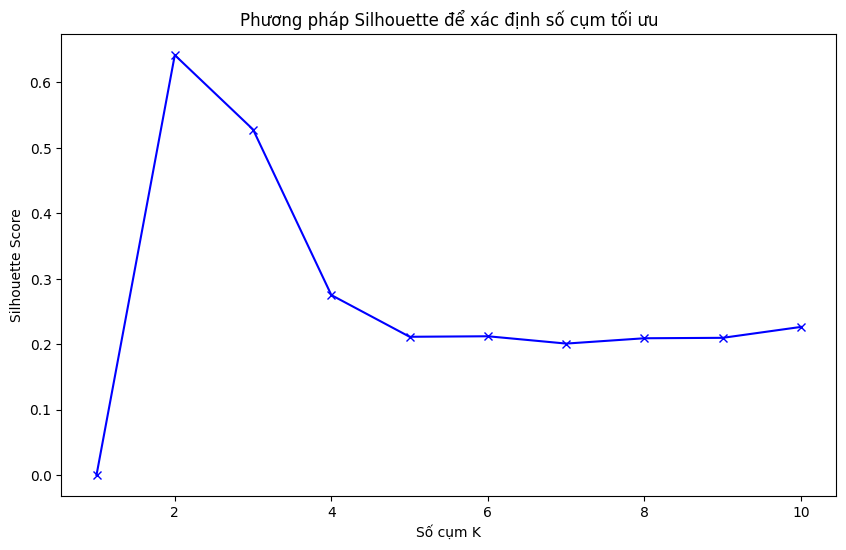

In [5]:
# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, 'bx-')
plt.xlabel('Số cụm K')
plt.ylabel('WCSS')
plt.title('Phương pháp Elbow để xác định số cụm tối ưu')
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('Số cụm K')
plt.ylabel('Silhouette Score')
plt.title('Phương pháp Silhouette để xác định số cụm tối ưu')
plt.show()

In [6]:
Y = data

K = 3  # Ví dụ: phân cụm thành 3 cụm

In [14]:


# Khởi tạo mô hình KMeans và huấn luyện
kmeans = KMeans(n_clusters=K,init='k-means++', max_iter=1000)
kmeans.fit(Y)
# Lấy các tâm cụm và nhãn của mỗi điểm dữ liệu
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroids", centroids)
# Thêm nhãn phân cụm vào DataFrame ban đầu
df1_cluster = data.copy()
df1_cluster["Cluster"] = kmeans.fit_predict(data)
cluster_stats = df1_cluster.groupby('Cluster')['Gia'].describe()


Centroids [[ 9.38602094  1.19331427  0.83094515  1.1775951   0.31203058  0.11854568
   0.12209282  0.53209992]
 [ 3.00957102 -0.285916   -0.29114897 -0.28864007 -0.06949364 -0.0379605
  -0.03366442 -0.15469239]
 [19.6896      1.44005728  2.93409495  1.55725527  0.26601968  0.34356682
   0.2398849   1.21282473]]


In [15]:

new_data_clustered = data_test.copy()
new_data_clustered["Cluster"] =kmeans.predict(data_test)
new_data_clustered.to_csv("clean data/clean_data_test_clustered.csv", encoding="utf-8-sig", index=False)

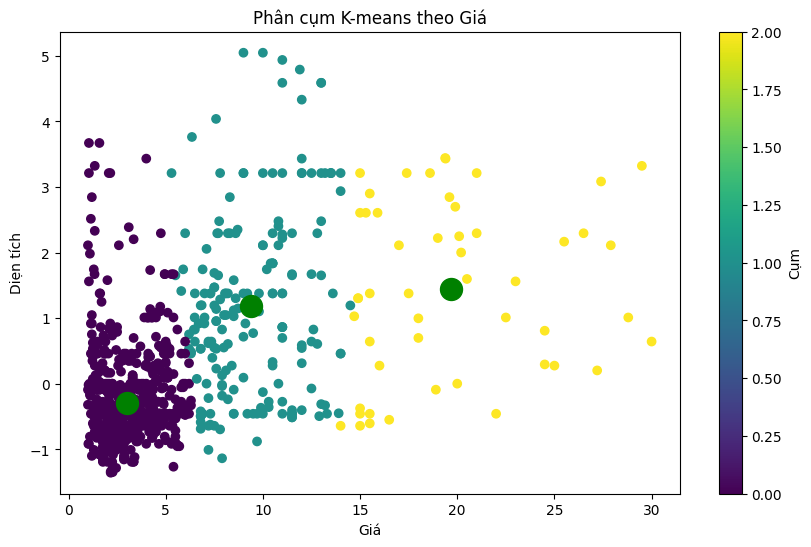

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Gia'], data['Dien tich'], c=df1_cluster['Cluster'], cmap='viridis')
plt.xlabel('Giá')
plt.ylabel('Diẹn tích')
plt.title('Phân cụm K-means theo Giá')
plt.colorbar(label='Cụm')
# plt.show()
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=250)
plt.show()


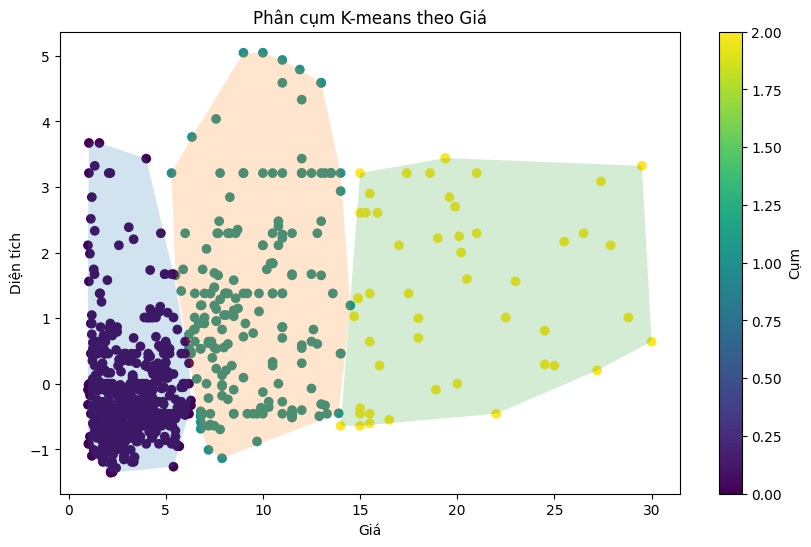

In [17]:
from scipy.spatial import ConvexHull

# Vẽ scatter plot của dữ liệu với màu tương ứng với cụm
plt.figure(figsize=(10, 6))
plt.scatter(data['Gia'], data['Dien tich'], c=df1_cluster['Cluster'], cmap='viridis')
plt.xlabel('Giá')
plt.ylabel('Diện tích')
plt.title('Phân cụm K-means theo Giá')
plt.colorbar(label='Cụm')

# Tính toán và vẽ convex hull cho từng cụm
for cluster in range(k):
    cluster_points = df1_cluster[df1_cluster['Cluster'] == cluster][['Gia', 'Dien tich']].values
    if len(cluster_points) > 2:  # ConvexHull yêu cầu ít nhất 3 điểm
        hull = ConvexHull(cluster_points)
        plt.fill(cluster_points[hull.vertices, 0], cluster_points[hull.vertices, 1], alpha=0.2)

plt.show()

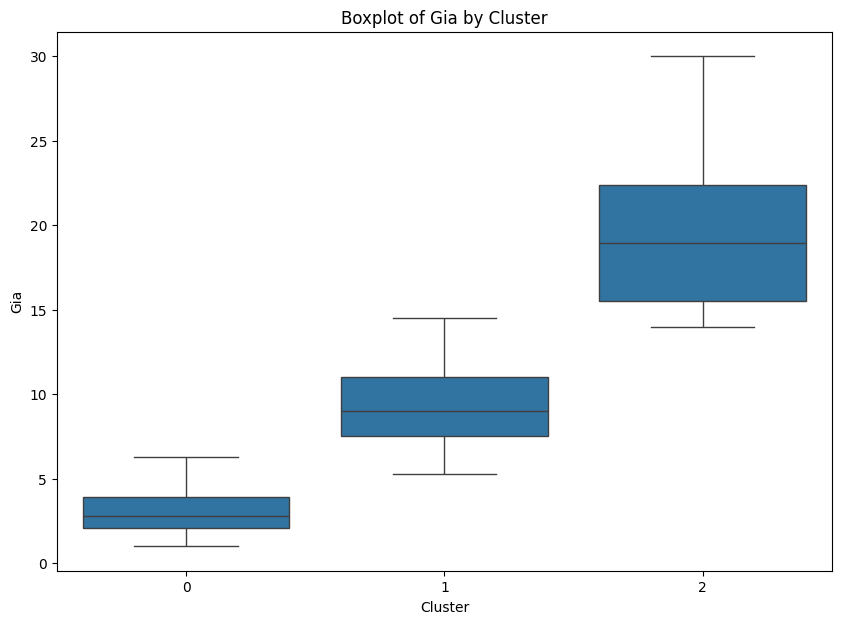

In [18]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="Cluster", y="Gia", data=df1_cluster)
plt.xlabel('Cluster')
plt.ylabel('Gia')
plt.title('Boxplot of Gia by Cluster')
plt.show()

In [19]:
print(cluster_stats)

          count       mean       std   min   25%    50%     75%   max
Cluster                                                              
0        1049.0   3.009571  1.195001   1.0   2.1   2.80   3.900   6.3
1         191.0   9.386021  2.303810   5.3   7.5   9.00  11.000  14.5
2          50.0  19.689600  4.598218  14.0  15.5  18.95  22.375  30.0


In [20]:
df1_cluster.to_csv("clean data/clean_data_train_clustered.csv", encoding="utf-8-sig", index=False)
df1_cluster

,Gia,Dien tich,Gia/m²,Chieu ngang,Chieu dai,Huong dat,Loai hinh dat,Quan,Cluster
0,3.15,-0.456774,-0.195102,-0.519699,-0.038198,-0.678012,-1.041156,0.011057,0
1,2.50,-0.842025,-0.189120,-0.082630,-1.643005,-0.408889,0.960471,2.672244,0
2,2.10,0.001859,-0.781291,-0.869355,2.903947,1.210937,0.960471,-0.601389,0
3,5.90,1.744663,-0.381725,1.665649,0.496737,1.392671,0.960471,0.265825,1
4,3.50,-0.676918,0.134679,-0.519699,-0.706867,1.210937,0.960471,0.265825,0
...,...,...,...,...,...,...,...,...,...
1285,1.40,-0.731954,-0.794450,-0.519699,-0.840601,0.638126,-1.041156,0.011057,0
1286,1.40,-0.731954,-0.794450,-0.519699,-0.840601,-1.054543,-1.041156,0.011057,0
1287,1.40,-0.731954,-0.794450,-0.519699,-0.840601,-1.054543,-1.041156,0.011057,0
1288,4.05,-0.071523,-0.116544,-0.082630,0.007271,1.243988,-1.041156,-0.601389,0


## hierarchical clustering

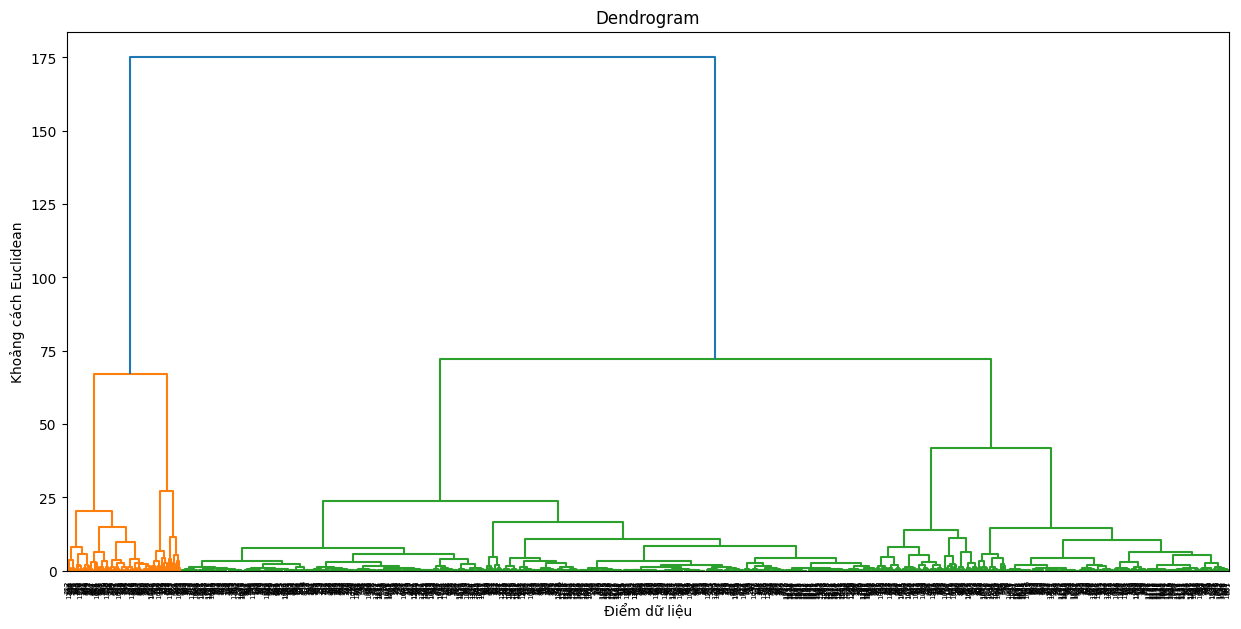

In [60]:

# Tạo dendrogram để hình dung quá trình phân cụm phân cấp
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(Y, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Điểm dữ liệu')
plt.ylabel('Khoảng cách Euclidean')
plt.show()

# Khởi tạo mô hình phân cụm phân cấp
hc = AgglomerativeClustering(n_clusters=K, metric='euclidean', linkage='ward')
labels = hc.fit_predict(Y)



# Thêm nhãn cụm vào DataFrame ban đầu
df2_cluster = data.copy()
df2_cluster["Cluster"] = labels



In [61]:
# In ra nhãn của các cụm
print("Nhãn cụm:", labels)

Nhãn cụm: [2 2 2 ... 2 1 2]


In [62]:
# Tính toán và hiển thị thống kê mô tả cho mỗi cụm
cluster_stats = df2_cluster.groupby('Cluster')['Gia'].describe()
print(cluster_stats)


         count       mean       std    min   25%    50%     75%   max
Cluster                                                              
0        126.0  14.956190  4.898712  10.00  11.5  13.10  16.875  30.0
1        391.0   5.553939  1.633956   2.59   4.3   5.00   6.650  10.3
2        773.0   2.429728  0.722610   1.00   1.8   2.45   3.000   3.8


In [63]:
df2_cluster

,Gia,Dien tich,Gia/m²,Chieu ngang,Chieu dai,Huong dat,Loai hinh dat,Quan,Cluster
0,3.15,-0.456774,-0.195102,-0.519699,-0.038198,-0.678012,-1.041156,0.011057,2
1,2.50,-0.842025,-0.189120,-0.082630,-1.643005,-0.408889,0.960471,2.672244,2
2,2.10,0.001859,-0.781291,-0.869355,2.903947,1.210937,0.960471,-0.601389,2
3,5.90,1.744663,-0.381725,1.665649,0.496737,1.392671,0.960471,0.265825,1
4,3.50,-0.676918,0.134679,-0.519699,-0.706867,1.210937,0.960471,0.265825,2
...,...,...,...,...,...,...,...,...,...
1285,1.40,-0.731954,-0.794450,-0.519699,-0.840601,0.638126,-1.041156,0.011057,2
1286,1.40,-0.731954,-0.794450,-0.519699,-0.840601,-1.054543,-1.041156,0.011057,2
1287,1.40,-0.731954,-0.794450,-0.519699,-0.840601,-1.054543,-1.041156,0.011057,2
1288,4.05,-0.071523,-0.116544,-0.082630,0.007271,1.243988,-1.041156,-0.601389,1


In [64]:
count_elements = df1_cluster['Cluster'].value_counts()

# Hiển thị kết quả
print(count_elements)

Cluster
0    1052
1     193
2      45
Name: count, dtype: int64
